In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset and ensure 'Date' is parsed as datetime
df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)

C:\Users\btulu\AppData\Local\Temp\ipykernel_24432\927573620.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'])


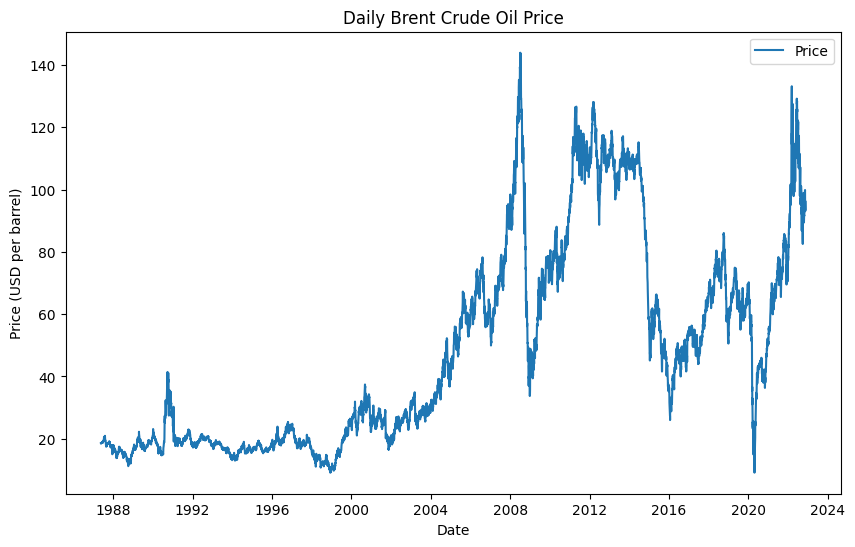

In [2]:
# Plot daily Brent oil prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Price')
plt.title('Daily Brent Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

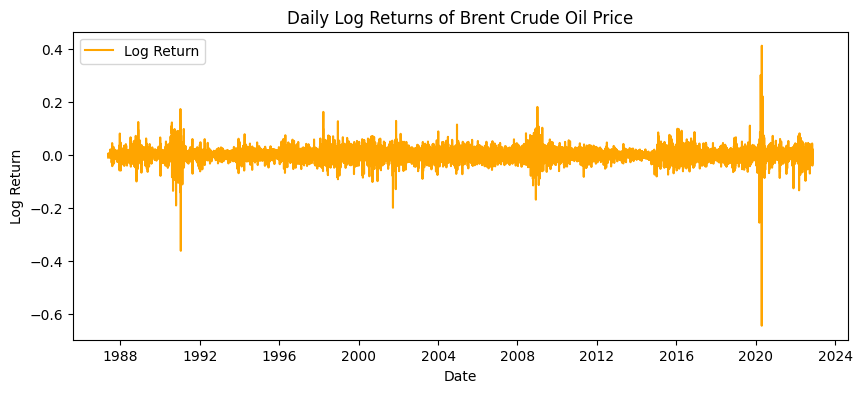

In [3]:
# Compute daily log returns of the price
df['LogReturn'] = np.log(df['Price']).diff()
log_returns = df['LogReturn'].dropna()  # drop the first NaN

# Plot daily log returns over time
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['LogReturn'], label='Log Return', color='orange')
plt.title('Daily Log Returns of Brent Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

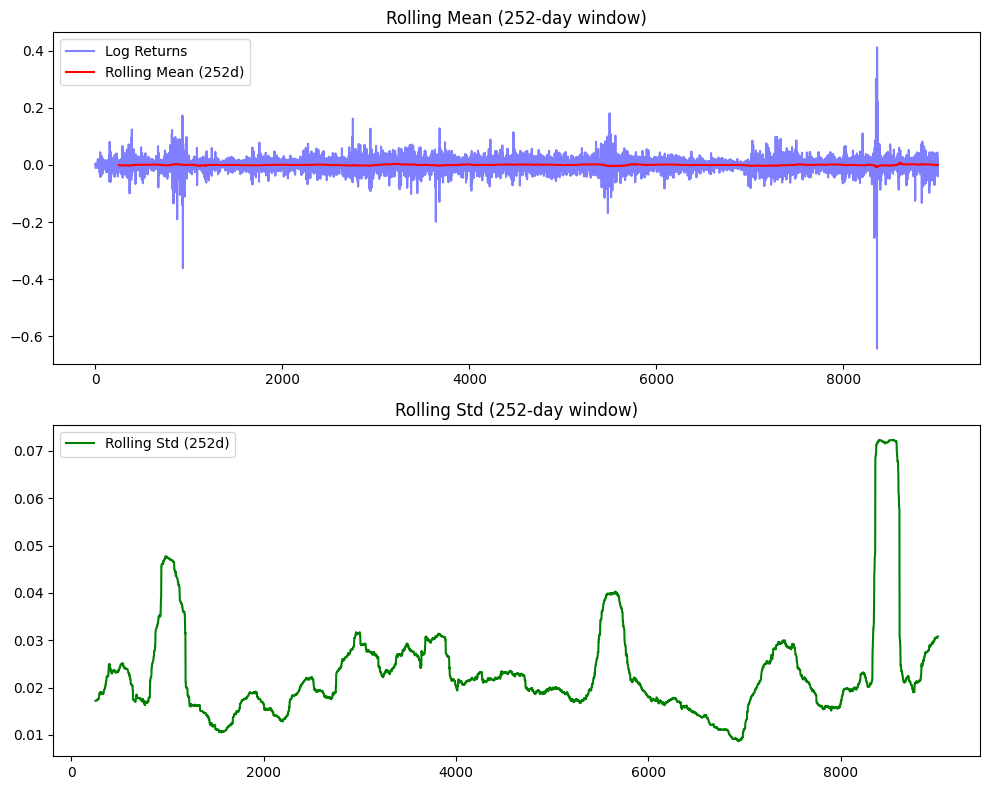

In [4]:
# Calculate rolling statistics (1-year window ~252 trading days) for log returns
roll_mean = log_returns.rolling(window=252).mean()
roll_std = log_returns.rolling(window=252).std()

# Plot rolling mean and standard deviation to assess stationarity
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(log_returns.index, log_returns.values, label='Log Returns', color='blue', alpha=0.5)
ax[0].plot(roll_mean.index, roll_mean.values, label='Rolling Mean (252d)', color='red')
ax[0].set_title('Rolling Mean (252-day window)')
ax[0].legend()
ax[1].plot(roll_std.index, roll_std.values, label='Rolling Std (252d)', color='green')
ax[1].set_title('Rolling Std (252-day window)')
ax[1].legend()
plt.tight_layout()
plt.show()

In [5]:
# Perform Augmented Dickey-Fuller test on log returns for stationarity
adf_result = adfuller(log_returns.values)
print("ADF Statistic: %f" % adf_result[0])
print("p-value: %f" % adf_result[1])

# Create DataFrame of major political/economic events impacting oil prices
events = [
    ("1990-08-02", "Iraq invades Kuwait (Gulf War begins)"),
    ("1991-01-17", "Operation Desert Storm begins"),
    ("1997-07-02", "Asian Financial Crisis begins (Thai baht devalued)"),
    ("1998-08-17", "Russian financial crisis (ruble devaluation)"),
    ("1999-03-23", "OPEC agrees to cut output (price recovery)"),
    ("2003-03-20", "US invades Iraq (Iraq War)"),
    ("2005-08-29", "Hurricane Katrina hits US Gulf Coast"),
    ("2008-09-15", "Lehman Brothers collapse (Global financial crisis)"),
    ("2011-02-15", "Arab Spring unrest (Libyan civil war)"),
    ("2014-11-27", "OPEC refuses output cut (price plummets)"),
    ("2016-11-30", "OPEC+ nations agree to cut output"),
    ("2018-05-08", "US reimposes sanctions on Iran"),
    ("2019-09-14", "Drone attack on Saudi Aramco facilities"),
    ("2020-03-09", "Oil price crash (COVID-19 & price war)"),
    ("2020-04-20", "WTI oil futures negative (Brent hits low)"),
    ("2022-02-24", "Russia invades Ukraine (price surges)")
]
df_events = pd.DataFrame(events, columns=["Date", "Event"])
df_events['Date'] = pd.to_datetime(df_events['Date'])
df_events.sort_values('Date', inplace=True)
print(df_events)  # Display the structured event DataFrame

# Save the event DataFrame to a CSV file
df_events.to_csv('BrentOilEvents.csv', index=False)

ADF Statistic: -16.427113
p-value: 0.000000
         Date                                              Event
0  1990-08-02              Iraq invades Kuwait (Gulf War begins)
1  1991-01-17                      Operation Desert Storm begins
2  1997-07-02  Asian Financial Crisis begins (Thai baht deval...
3  1998-08-17       Russian financial crisis (ruble devaluation)
4  1999-03-23         OPEC agrees to cut output (price recovery)
5  2003-03-20                         US invades Iraq (Iraq War)
6  2005-08-29               Hurricane Katrina hits US Gulf Coast
7  2008-09-15  Lehman Brothers collapse (Global financial cri...
8  2011-02-15              Arab Spring unrest (Libyan civil war)
9  2014-11-27           OPEC refuses output cut (price plummets)
10 2016-11-30                  OPEC+ nations agree to cut output
11 2018-05-08                     US reimposes sanctions on Iran
12 2019-09-14            Drone attack on Saudi Aramco facilities
13 2020-03-09             Oil price crash (COV